<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Pytorch/blob/main/PyTorch%20Workflow/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**

Data can be anything

* Excel Spreadsheet
* Images of anykind
* Video (Youtube has lots of data)
* Audio like podcast or songs
* DNA
* Text etc...

Machine learning has two primary parts

1. Get the data in numerical representations
2. Build a model to learn patterns in that numerical representation

## **Demo with Linear Regression**

In [1]:
import torch
from torch import nn ## nn contains all the bulding blocks for neural network
import matplotlib.pyplot as plt

In [2]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(y)

(50, 50)

## **Splitting Data in Training and Test Sets**

In [4]:
# Create a train and test split
train_split = int(0.8 * len(X))
X_train, y_train = X[0:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, X_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

## **Visualize the data**

In [5]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  """
  Plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10,7))

  # Plot the training data in blue
  plt.scatter(train_data, train_labels, c="b", s=6, label="Training Data")

  # Plot the testing data in green
  plt.scatter(test_data, test_labels, c="g", s=6, label="Testing Data")

  if predictions is not None:

    plt.scatter(test_data, predictions, color="orange", s=6, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


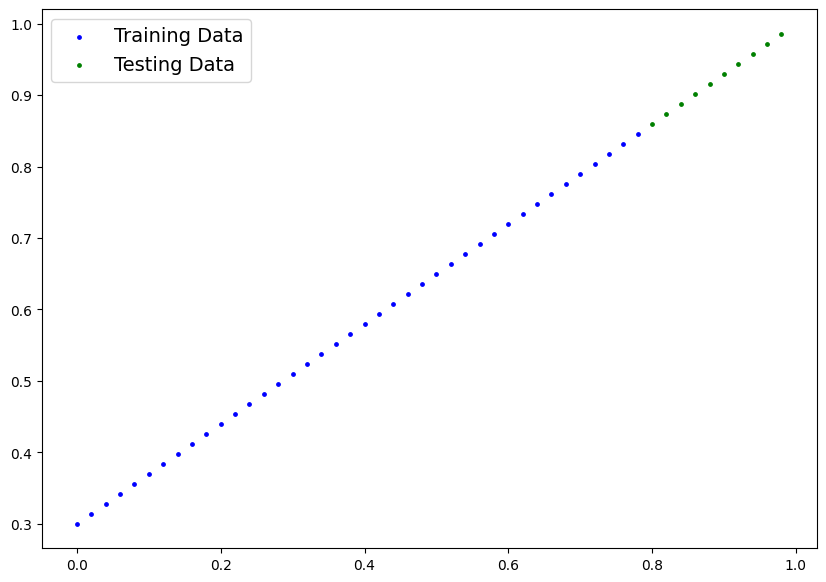

In [6]:
plot_prediction()

## **Build a Liner Regression Model**

In [7]:
# Create Linear Regression class
class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(
                             1, # Starts with a random weight and try to adjust it to the ideal weight
                             requires_grad=True,
                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(
                            1, # Starts with a random bias and try to adjust it to the ideal bias
                            requires_grad=True,
                            dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias

## **Checking the contents of our PyTorch model**

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the linear regression model
model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## **Making Predictions using torch.inference_model()**

To check our model's predictive power, let's see how well it predicts y_test based on X_test.

When we pass data through our model, it's going to run it through forward() method

In [10]:
# Make predictions with model
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

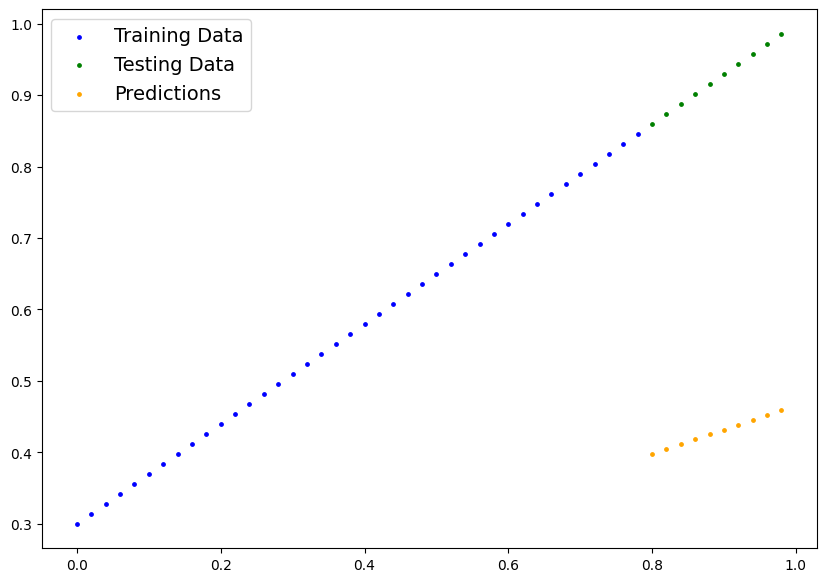

In [11]:
plot_prediction(predictions=y_pred)

## **Train Model**

The whole idea of training is for a model to move from some unknown parameters (these my be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong models predictions are is to use a loss function.

**Note** : Loss function may also be called cost function or criterion in different areas.

Things we need to train:

**Loss Function** : A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

**Optimizer** : Takes into account the loss of a model and adjust the model's parameters (weights & bias)

In [12]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Setup a optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) # Learning rate

## **Building A Training Loop And A Testing Loop in PyTorch**

Requirements in atraining loop

1. Loop through the data
2. Forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called forward propagation
3. Calculate the loss (compare forward predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss ( **backpropagation** ).
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss ( **gradient descent** )

In [13]:
# An epoch is 1 loop in the data
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

# loop through the data
for epoch in range(epochs):
  # Set the modelto training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss : {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (gradient descent)
  optimizer.step()

  model_0.eval() # turns off gradient tracking

  with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Loss : 0.31288138031959534
Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Loss : 0.3013603389263153
Loss : 0.28983935713768005
Loss : 0.2783183455467224
Loss : 0.26679736375808716
Loss : 0.2552763521671295
Loss : 0.24375534057617188
Loss : 0.23223432898521423
Loss : 0.22071333229541779
Loss : 0.20919232070446014
Loss : 0.1976713240146637
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Loss : 0.18615034222602844
Loss : 0.1746293306350708
Loss : 0.16310831904411316
Loss : 0.1515873372554779
Loss : 0.14006635546684265
Loss : 0.1285453587770462
Loss : 0.11702437698841095
Loss : 0.1060912236571312
Loss : 0.09681284427642822
Loss : 0.08908725529909134
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Loss : 0.08227583020925522
Loss : 0.07638873159885406
Loss : 0.07160007208585739
Loss : 0.06747635453939438
Loss : 0.06395438313484192
Loss : 0.06097004935145378
Loss : 0.058458190411329

In [14]:
y_preds_new = model_0(X_test)

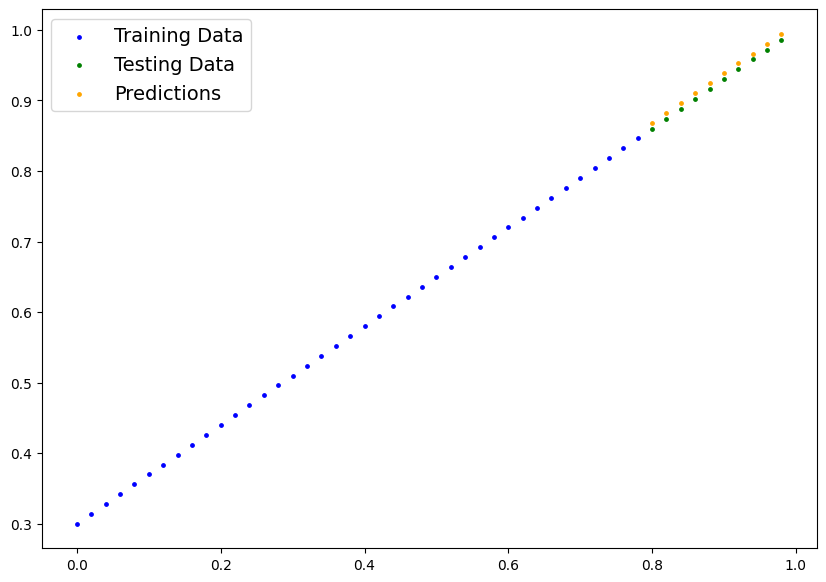

In [15]:
plot_prediction(predictions=y_preds_new.detach().numpy())

## **Plot Loss Curves**

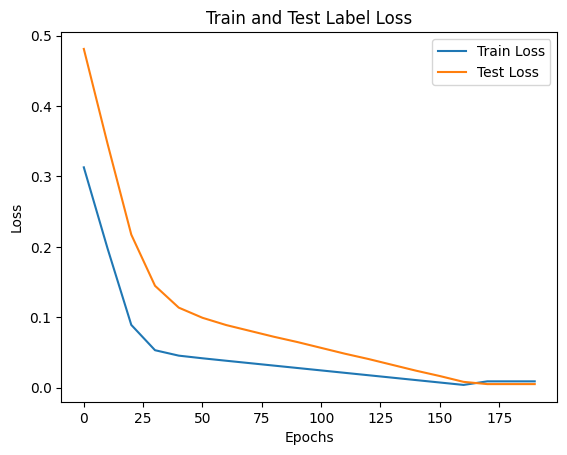

In [16]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Train and Test Label Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## **Saving a model in PyTorch**

There are theree main methods for saving and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows you to load a model's saved state dictionary

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [18]:
# Saving our PyTorch Model
from pathlib import Path

# Create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state_dict
print(f"Saving the model to the path: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to the path: models/01_pytorch_workflow_model_0.pth


## **Loading a PyTorch Model**

Since we saved our model's state_dict() rather the entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [19]:
# To load the saved_dict of the model we have
# to instantiate a new instance of our model class
loaded_model_0 = LinearRegression()

# Load the state_dict of the model (this will update the new instance with the updated parameters or the trained parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [20]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
from torch.autograd.grad_mode import inference_mode
# Make some predictions with our loaded model
loaded_model_0.eval()

with inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])